<a href="https://colab.research.google.com/github/RushiBhatt007/ece209as_project/blob/main/software/missingness_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
!pip install missingno

# Use 'msno' alias when importing
import missingno as msno

In [40]:
imu = pd.read_csv('Phone_imu_standing.csv')
imu.columns = ['timestamp','accel','accel_X', 'accel_Y', 'accel_Z',
                    'gyro', 'gyro_X', 'gyro_Y','gyro_Z',  
                    'mag','mag_X', 'mag_Y', 'mag_Z']

In [41]:
imu = imu.drop(['timestamp','accel', 'gyro', 'mag'], axis=1)

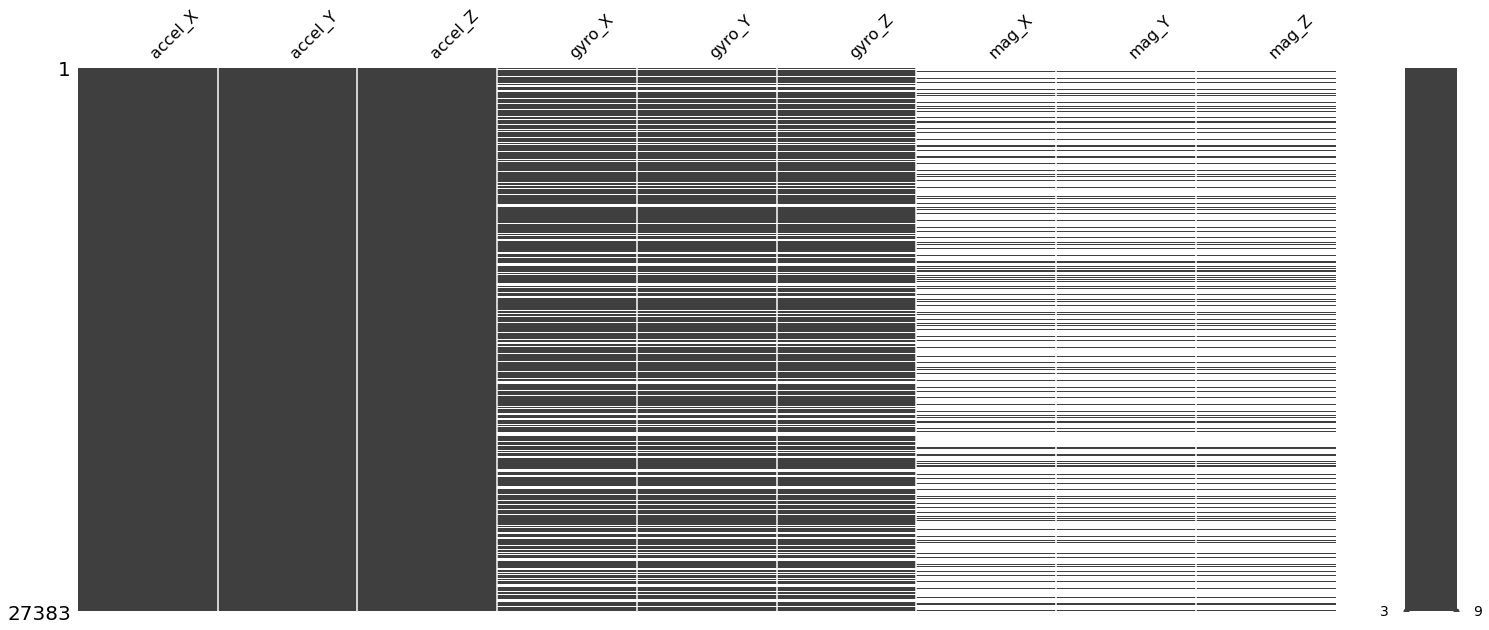

In [42]:
msno.matrix(imu);

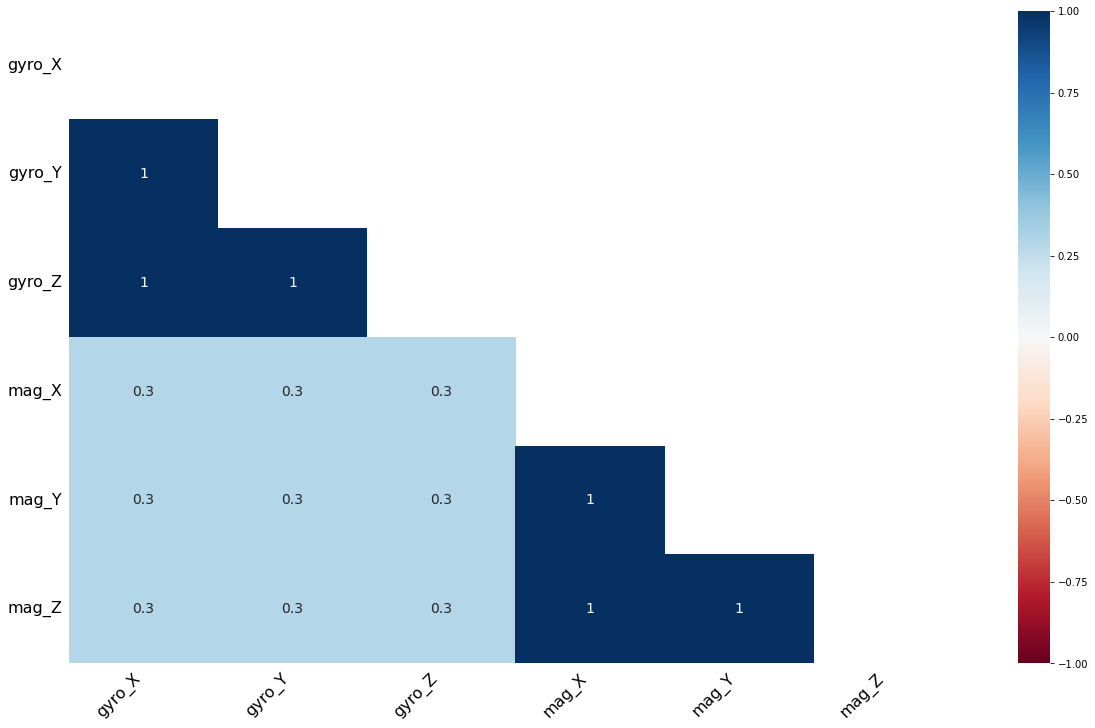

In [43]:
msno.heatmap(imu);

In [46]:
imu_walk = pd.read_csv('Phone_imu_walking.csv')
imu_walk.columns = ['timestamp','accel','accel_X', 'accel_Y', 'accel_Z',
                    'gyro', 'gyro_X', 'gyro_Y','gyro_Z',  
                    'mag','mag_X', 'mag_Y', 'mag_Z']

In [48]:
imu_walk = imu_walk.drop(['timestamp','accel', 'gyro', 'mag'], axis=1)

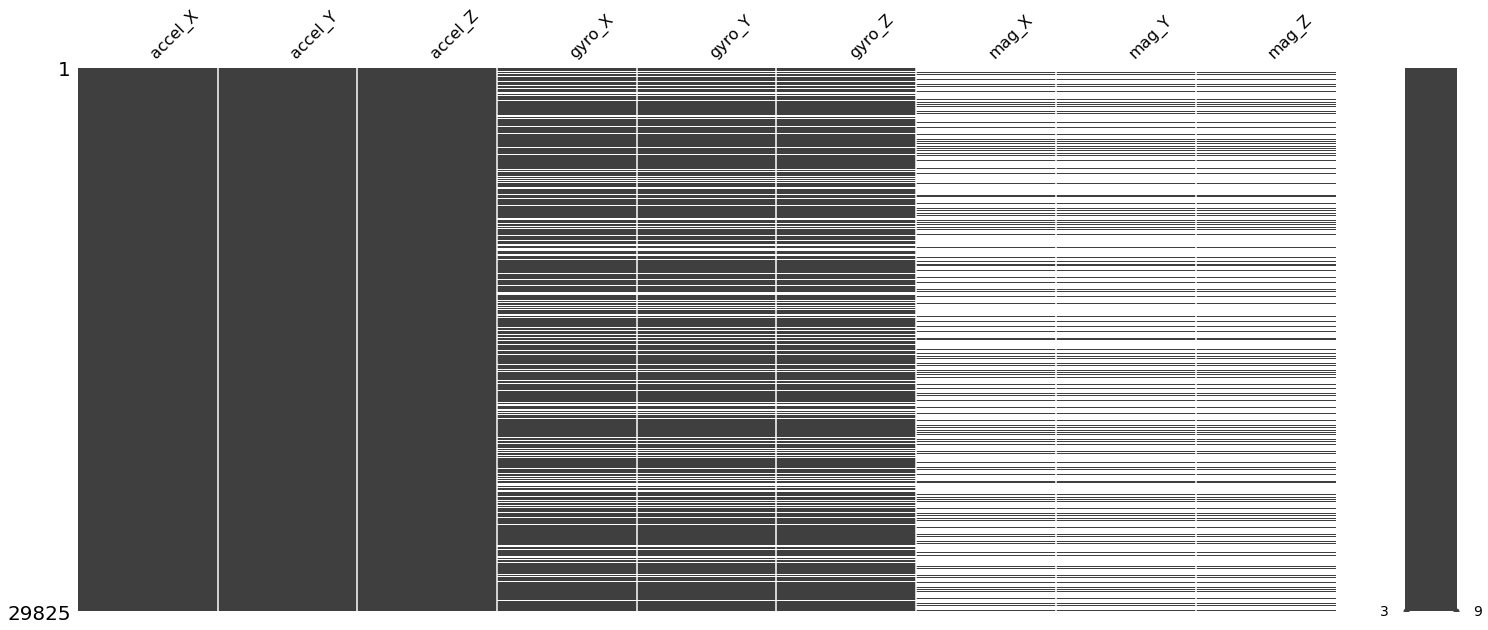

In [49]:
msno.matrix(imu_walk);

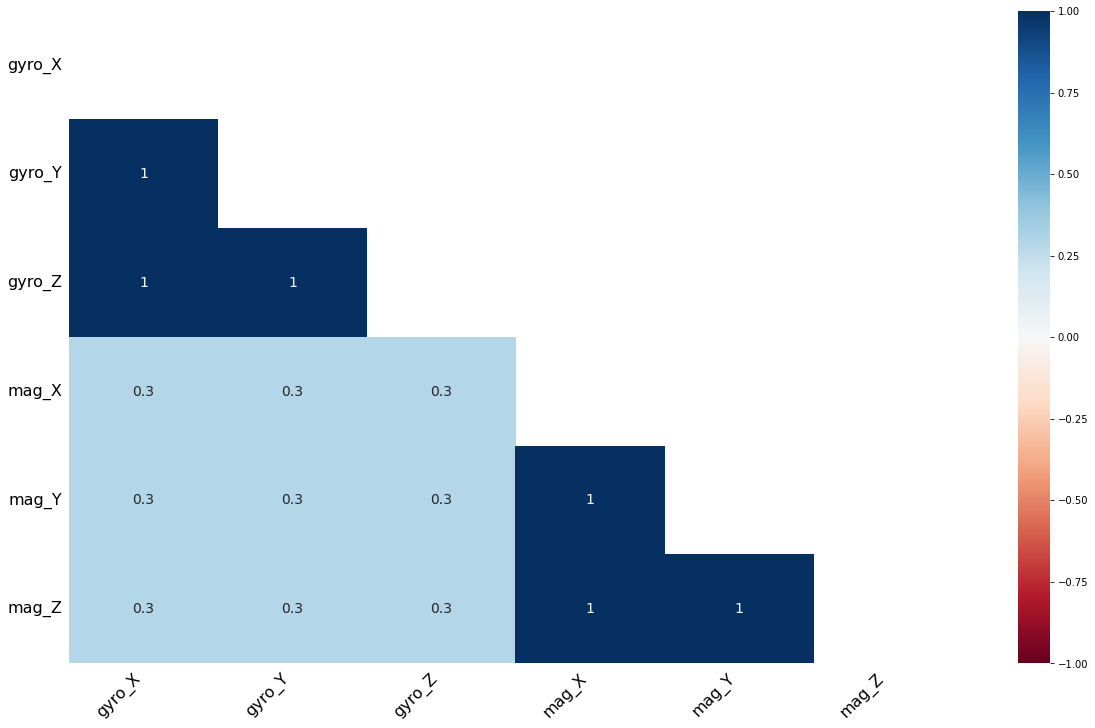

In [50]:
msno.heatmap(imu);

In [56]:
imu.isna().sum()*100/imu.size

accel_X    0.000000
accel_Y    0.000000
accel_Z    0.000000
gyro_X     2.763272
gyro_Y     2.763272
gyro_Z     2.763272
mag_X      8.830296
mag_Y      8.830296
mag_Z      8.830296
dtype: float64

In [57]:
imu_walk.isna().sum()*100/imu_walk.size

accel_X    0.000000
accel_Y    0.000000
accel_Z    0.000000
gyro_X     2.510943
gyro_Y     2.510943
gyro_Z     2.510943
mag_X      8.775263
mag_Y      8.775263
mag_Z      8.775263
dtype: float64

PAMAP2 dataset

In [35]:
pam = pd.read_csv('subject101.dat', delimiter=' ')

#The 54 columns in the data files are organized as follows:
# 1. timestamp (s)
# 2. activityID (see below for the mapping to the activities)
# 3. heart rate (bpm)
# 4-20. IMU hand
# 21-37. IMU chest
# 38-54. IMU ankle

# The IMU sensory data contains the following columns:
# 1. temperature (Â°C)
# 2-4. 3D-acceleration data (ms-2), scale: Â±16g, resolution: 13-bit
# 5-7. 3D-acceleration data (ms-2), scale: Â±6g, resolution: 13-bit
# 8-10. 3D-gyroscope data (rad/s)
# 11-13. 3D-magnetometer data (Î¼T)
# 14-17. orientation (invalid in this data collection)

pam.columns = ['timestamp',
               'activityID',
               'heart_rate',
               'h_temp1', 'h_accel1_X', 'h_accel1_Y', 'h_accel1_Z','h_accel2_X', 'h_accel2_Y', 'h_accel2_Z','h_gyro_X', 'h_gyro_Y','h_gyro_Z', 'h_mag_X', 'h_mag_Y', 'h_mag_Z', 'h_or_1', 'h_or_2', 'h_or_3', 'h_or_4',
               'c_temp1', 'c_accel1_X', 'c_accel1_Y', 'c_accel1_Z','c_accel2_X', 'c_accel2_Y', 'c_accel2_Z','c_gyro_X', 'c_gyro_Y','c_gyro_Z', 'c_mag_X', 'c_mag_Y', 'c_mag_Z', 'c_or_1', 'c_or_2', 'c_or_3', 'c_or_4',
               'a_temp1', 'a_accel1_X', 'a_accel1_Y', 'a_accel1_Z','a_accel2_X', 'a_accel2_Y', 'a_accel2_Z','a_gyro_X', 'a_gyro_Y','a_gyro_Z', 'a_mag_X', 'a_mag_Y', 'a_mag_Z', 'a_or_1', 'a_or_2', 'a_or_3', 'a_or_4']

In [36]:
pam.head()

,timestamp,activityID,heart_rate,h_temp1,h_accel1_X,h_accel1_Y,h_accel1_Z,h_accel2_X,h_accel2_Y,h_accel2_Z,...,a_gyro_X,a_gyro_Y,a_gyro_Z,a_mag_X,a_mag_Y,a_mag_Z,a_or_1,a_or_2,a_or_3,a_or_4
0,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
1,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
2,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
3,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
4,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.006089,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0


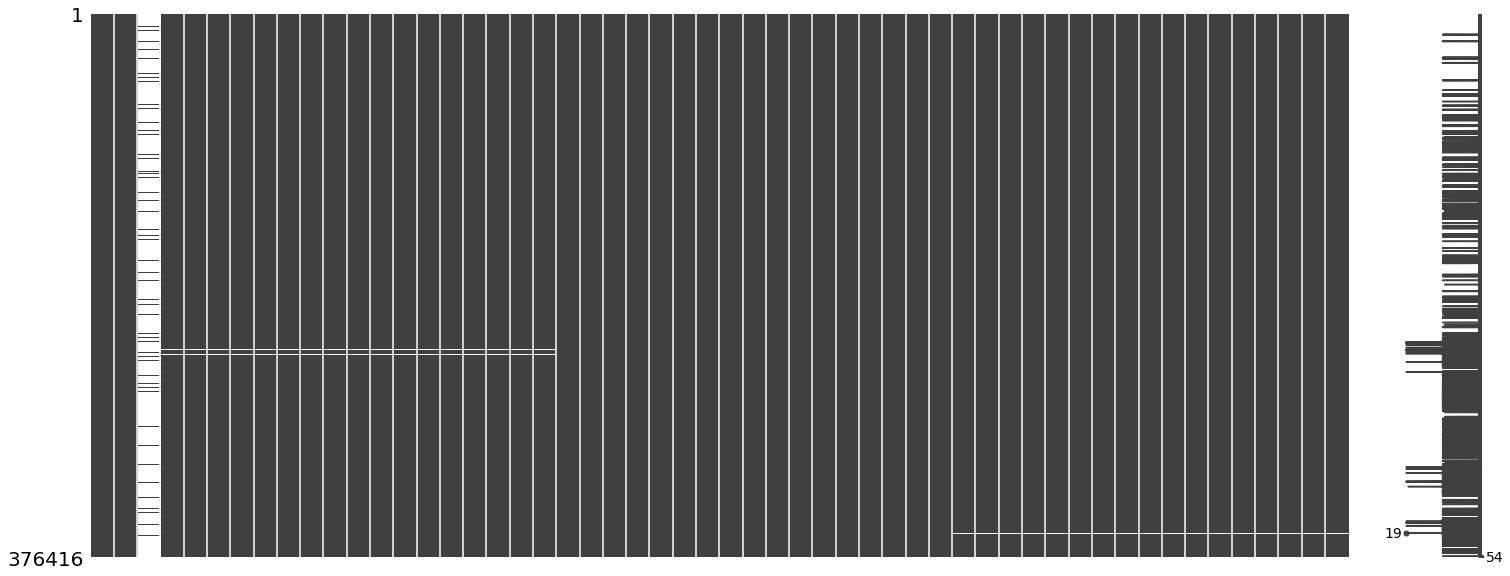

In [37]:
msno.matrix(pam);